In [20]:
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.25, palette='tab10')

In [21]:
import os.path as op
from risk_experiment.cogmodels.fit_model import build_model, get_data
bids_folder = '/data/ds-risk'

In [22]:
model_label = 'neural3'
session = '3t2'
bids_folder = '/data/ds-risk'
roi = 'npcr'

cm = 1/2.54  # centimeters in inches

In [23]:
data = get_data(model_label, session, bids_folder, roi)

100%|██████████| 30/30 [00:01<00:00, 18.70it/s]


In [24]:
model = build_model(model_label, data, roi)

In [25]:
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', 'ses-3t2_model-neural3_trace.netcdf'))

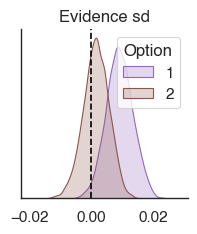

In [26]:
evidence_sd = pd.concat((idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'n1_evidence_sd_mu':1, 'n2_evidence_sd_mu':2})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=sns.color_palette()[4:], aspect=1.1, height=2.5)
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Evidence sd')
# fac.add_legend()
plt.legend(title='Option')

plt.axvline(0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural_evidence_sd.pdf'), bbox_inches='tight')

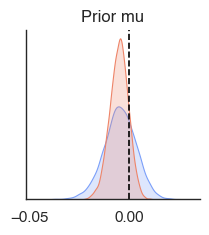

In [27]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_mu_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_mu_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior mu')

plt.axvline(0.0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural_prior_mu.pdf'), bbox_inches='tight')

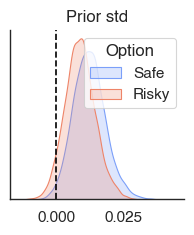

In [28]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_std_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior std')

plt.axvline(0.0, c='k', ls='--')

plt.legend(title='Option')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural3_prior_std.pdf'), bbox_inches='tight')

In [29]:
ppc = model.ppc(trace=idata.sel(draw=slice(None, None, 10)), data=data)

# "Chose risky" vs "chose 2nd option coding"
ppc.loc[ppc.index.get_level_values('risky_first')] = 1 - ppc.loc[ppc.index.get_level_values('risky_first')]


Plotting ppc type 11
           median_split(sd) log(risky/safe)  p_predicted    hdi025    hdi975  \
0   High neural uncertainty               1     0.240086  0.187847  0.287051   
1   High neural uncertainty               2     0.342333  0.293098  0.381441   
2   High neural uncertainty               3     0.445481  0.401523  0.487908   
3   High neural uncertainty               4     0.549241  0.510787  0.585522   
4   High neural uncertainty               5     0.627799  0.587440  0.665598   
5   High neural uncertainty               6     0.686336  0.641422  0.732747   
6    Low neural uncertainty               1     0.230241  0.182853  0.275523   
7    Low neural uncertainty               2     0.360169  0.315042  0.403931   
8    Low neural uncertainty               3     0.457679  0.419136  0.501538   
9    Low neural uncertainty               4     0.571934  0.533801  0.608922   
10   Low neural uncertainty               5     0.668440  0.626276  0.704927   
11   Low neural unc

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:65: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:240: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:71: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


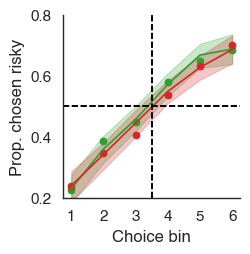

In [30]:
from risk_experiment.cogmodels.utils import plot_ppc
fac = plot_ppc(data, ppc, 11, level='group', legend=False)

fac.fig.set_size_inches(6.4*cm, 6.4*cm)
fac.set(xlabel='Choice bin', ylim=(.2, .8), xticks=[1,2,3,4,5,6])

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural3_ppc11.pdf'), bbox_inches='tight')

Plotting ppc type 12
    risky_first         median_split(sd)  n_safe  p_predicted    hdi025  \
0         False  High neural uncertainty     5.0     0.510044  0.443398   
1         False  High neural uncertainty     7.0     0.529197  0.469033   
2         False  High neural uncertainty    10.0     0.526254  0.473721   
3         False  High neural uncertainty    14.0     0.526067  0.476509   
4         False  High neural uncertainty    20.0     0.527774  0.471668   
5         False  High neural uncertainty    28.0     0.501847  0.448805   
6         False   Low neural uncertainty     5.0     0.532385  0.465810   
7         False   Low neural uncertainty     7.0     0.526343  0.471648   
8         False   Low neural uncertainty    10.0     0.529856  0.474930   
9         False   Low neural uncertainty    14.0     0.513496  0.466490   
10        False   Low neural uncertainty    20.0     0.494573  0.437302   
11        False   Low neural uncertainty    28.0     0.510311  0.448201   
12  

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:240: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:71: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose

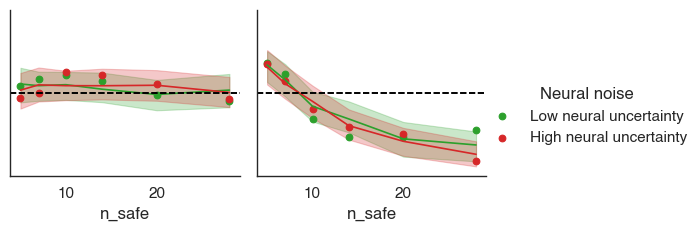

In [31]:
from risk_experiment.cogmodels.utils import plot_ppc
fac = plot_ppc(data, ppc, 12, level='group', legend=True)

fac.set(ylim=(.2, .8), ylabel=None, yticks=[])
fac.set_titles('')
fac.fig.set_size_inches(3.1*6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural3_ppc13.pdf'), bbox_inches='tight')
# plt.tight_layout()

# 7t2

In [32]:
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', 'ses-7t2_model-neural3_trace.netcdf'))

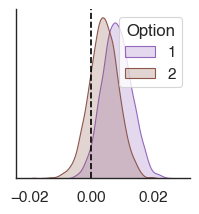

In [33]:
evidence_sd = pd.concat((idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'n1_evidence_sd_mu':1, 'n2_evidence_sd_mu':2})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=sns.color_palette()[4:], aspect=1.1, height=2.5)
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
# plt.title('Evidence sd')
# fac.add_legend()
plt.legend(title='Option')

plt.axvline(0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural_evidence_sd.pdf'), bbox_inches='tight')

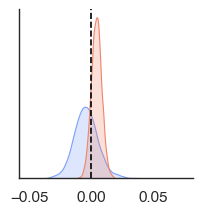

In [34]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_mu_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_mu_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
# plt.title('Prior mu')

plt.axvline(0.0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural_prior_mu.pdf'), bbox_inches='tight')

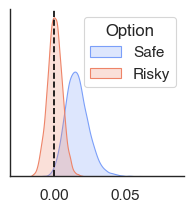

In [35]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_std_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
# plt.title('Prior std')

plt.axvline(0.0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)

plt.legend(title='Option')
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural3_prior_std.pdf'), bbox_inches='tight')

In [36]:
ppc = model.ppc(trace=idata.sel(draw=slice(None, None, 10)), data=data)

# "Chose risky" vs "chose 2nd option coding"
ppc.loc[ppc.index.get_level_values('risky_first')] = 1 - ppc.loc[ppc.index.get_level_values('risky_first')]


Plotting ppc type 11
           median_split(sd) log(risky/safe)  p_predicted    hdi025    hdi975  \
0   High neural uncertainty               1     0.249636  0.201248  0.299390   
1   High neural uncertainty               2     0.353875  0.312971  0.404357   
2   High neural uncertainty               3     0.440289  0.397561  0.479945   
3   High neural uncertainty               4     0.537044  0.495914  0.584151   
4   High neural uncertainty               5     0.607617  0.567277  0.651805   
5   High neural uncertainty               6     0.688340  0.635565  0.734109   
6    Low neural uncertainty               1     0.208787  0.165023  0.251964   
7    Low neural uncertainty               2     0.339995  0.298757  0.383159   
8    Low neural uncertainty               3     0.432011  0.392394  0.473653   
9    Low neural uncertainty               4     0.542236  0.500131  0.580156   
10   Low neural uncertainty               5     0.620922  0.577369  0.664767   
11   Low neural unc

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:65: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:240: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:71: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


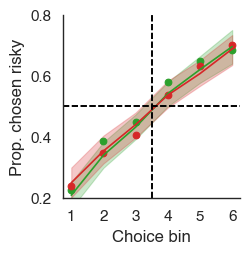

In [37]:
from risk_experiment.cogmodels.utils import plot_ppc
fac = plot_ppc(data, ppc, 11, level='group', legend=False)

fac.fig.set_size_inches(6.4*cm, 6.4*cm)
fac.set(xlabel='Choice bin', ylim=(.2, .8), xticks=[1,2,3,4,5,6])

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural3_ppc11.pdf'), bbox_inches='tight')

Plotting ppc type 12
    risky_first         median_split(sd)  n_safe  p_predicted    hdi025  \
0         False  High neural uncertainty     5.0     0.497674  0.442249   
1         False  High neural uncertainty     7.0     0.509656  0.447569   
2         False  High neural uncertainty    10.0     0.501773  0.448840   
3         False  High neural uncertainty    14.0     0.496227  0.429281   
4         False  High neural uncertainty    20.0     0.479280  0.424710   
5         False  High neural uncertainty    28.0     0.461726  0.408645   
6         False   Low neural uncertainty     5.0     0.475267  0.409590   
7         False   Low neural uncertainty     7.0     0.474056  0.411382   
8         False   Low neural uncertainty    10.0     0.486109  0.435495   
9         False   Low neural uncertainty    14.0     0.482381  0.432815   
10        False   Low neural uncertainty    20.0     0.476848  0.423335   
11        False   Low neural uncertainty    28.0     0.489415  0.434563   
12  

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:240: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:71: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose

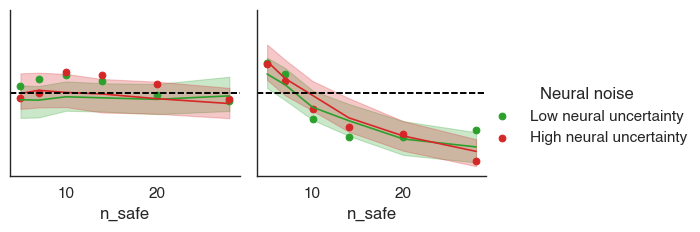

In [38]:
from risk_experiment.cogmodels.utils import plot_ppc
fac = plot_ppc(data, ppc, 12, level='group', legend=True)

fac.set(ylim=(.2, .8), ylabel=None, yticks=[])
fac.set_titles('')
fac.fig.set_size_inches(3.1*6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural3_ppc13.pdf'), bbox_inches='tight')
# plt.tight_layout()